In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from quilt.data.ResidentMario import missingno_data
import missingno as msno
import seaborn as sns
import itertools

In [2]:
dstrain = pd.read_csv("C:\\Users\\bekka\\projetwavestone\\train.csv" , low_memory = False)
dstore = pd.read_csv("C:\\Users\\bekka\\projetwavestone\\store.csv")

In [3]:
dstrain.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
dstrain.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
dstrain.shape


(1017209, 9)

In [6]:
dstrain.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [7]:
dstore.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
dstore.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [9]:
dstrain.shape

(1017209, 9)

In [10]:
dstrain.count(0)
#Toutes les colonnes sont remplies

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [11]:
print(" nombre des magasins fermés certains jours : {}".format(dstrain[(dstrain.Open == 0)].count()[0]))  
print(" dont pour uniquement vacances scolaires : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.SchoolHoliday == 1) & (dstrain.StateHoliday == '0')].count()[0]))    
print(" et pour StateHolidays (hors vacances scolaires) : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.SchoolHoliday == 0 ) & (dstrain.StateHoliday == 'a') | (dstrain.StateHoliday == 'b') |  (dstrain.StateHoliday == 'c')].count()[0]))  
print(" et pour StateHolidays (vacances scolaires comprises) : {}".format(dstrain[(dstrain.Open == 0) & (dstrain.StateHoliday == 'a') | (dstrain.StateHoliday == 'b') |  (dstrain.StateHoliday == 'c')].count()[0]))  
print(" et pour aucune de ces raisons : {} ".format(dstrain[(dstrain.Open == 0) & (dstrain. StateHoliday == '0') & (dstrain.SchoolHoliday == 0)].count()[0])) 

 nombre des magasins fermés certains jours : 172817
 dont pour uniquement vacances scolaires : 3067
 et pour StateHolidays (hors vacances scolaires) : 25255
 et pour StateHolidays (vacances scolaires comprises) : 30356
 et pour aucune de ces raisons : 139610 


In [12]:
print("nombre lignes avec promo démarrant en Janvier : {}".format(dstore[(dstore.PromoInterval == 'Jan,Apr,Jul,Oct')].count()[0]))
print("nombre lignes avec promo démarrant en Janvier : {}".format(dstore[(dstore.PromoInterval == 'Feb,May,Aug,Nov')].count()[0]))
print("nombre lignes avec promo démarrant en Janvier : {}".format(dstore[(dstore.PromoInterval == 'Mar,Jun,Sept,Dec')].count()[0]))
print("nombre lignes vides : {}".format(dstore[~dstore['PromoInterval'].isnull()].count()))

print(" nombre promo2 = 0 et Promo2sinceWeek = Nan : {}".format(dstore[~dstore['Promo2SinceWeek'].isnull() & (dstore.Promo2 == 0)].count()[0]))


nombre lignes avec promo démarrant en Janvier : 335
nombre lignes avec promo démarrant en Janvier : 130
nombre lignes avec promo démarrant en Janvier : 106
nombre lignes vides : Store                        571
StoreType                    571
Assortment                   571
CompetitionDistance          570
CompetitionOpenSinceMonth    365
CompetitionOpenSinceYear     365
Promo2                       571
Promo2SinceWeek              571
Promo2SinceYear              571
PromoInterval                571
dtype: int64
 nombre promo2 = 0 et Promo2sinceWeek = Nan : 0


In [13]:
# Les magasins fermés pour aucune raison doivent-ils être supprimés ? Bonne question ? ça dépend de ce que l'on cherche à prédire 
# TODO : tester sur dstrain et dstrain_old en gardant ces données suspectes

In [14]:
dstrain[(dstrain.Open == 0)].count()[0]

172817

In [15]:
print(" Magasins ouverts avec 0 ventes : {}".format(dstrain[(dstrain.Open == 1) & (dstrain.Sales == 0)].count()[0]))
# Aberrant ou pas ? Discussion à venir

 Magasins ouverts avec 0 ventes : 54


In [16]:
dstrain = dstrain.drop(dstrain[(dstrain.Open == 0) & (dstrain.Sales == 0)].index)
dstrain.shape
dstrain.reset_index(drop=True)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [17]:
# Un peu de statistiques et de Data Viz :) 


In [18]:
#Sales : 
dstrain.Sales.describe()
# Pour Sales, il faut enlever les lignes qui correspondent au cas : Open = 1 & Sales = 0
dstrain["Sales"]
dstrain=dstrain.drop(dstrain[(dstrain.Open == 1) & (dstrain.Sales == 0)].index)
dstrain = dstrain.reset_index(drop=True) 

(46, 41551)

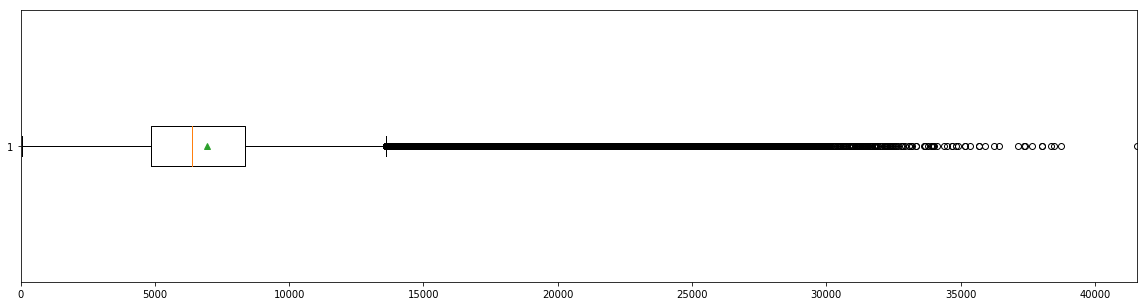

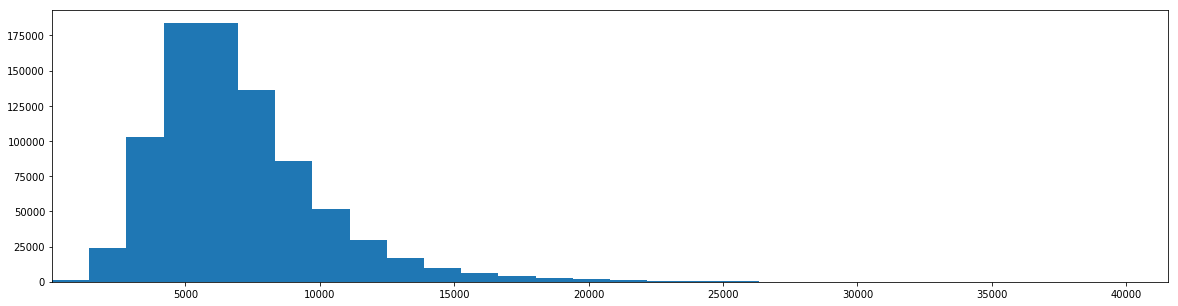

In [19]:
fig1 , ax1 = plt.subplots(1 , 1 , figsize = (20 , 5))
ax1.boxplot(dstrain.Sales , showmeans=True , vert=False)
ax1.set_xlim(0, max(dstrain["Sales"]))
fig2 , ax2 = plt.subplots(1 , 1 , figsize = (20 , 5))

ax2.hist(dstrain.Sales , cumulative = False , bins = 30 )
ax2.set_xlim((min(dstrain.Sales) , max(dstrain.Sales)))

In [20]:
print("mean : {}".format(np.mean(dstrain.Sales)))
print("median : {} ".format(np.median(dstrain.Sales)))


mean : 6955.959133664481
median : 6369.0 


In [21]:
# Il y a des magasins qui font de très grandes ventes (>15.000 par exemple) est-ce normal ou dû à des erreurs dans la BD ? Point à disucter TODO !!
# Quantité de ces données : 
print("pourcentage des ventes > 15.000 : {}".format(dstrain[dstrain.Sales>15000].count()[0]/dstrain.shape[0] * 100))

# dstrain[dstrain.Sales>15000]
# C'est normal, + de ventes et visites en période de soldes/vacances


pourcentage des ventes > 15.000 : 2.3368603568713002


In [22]:
#Idem pour customers : 


In [23]:
dstrain.Customers.describe()


count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

(8, 7388)

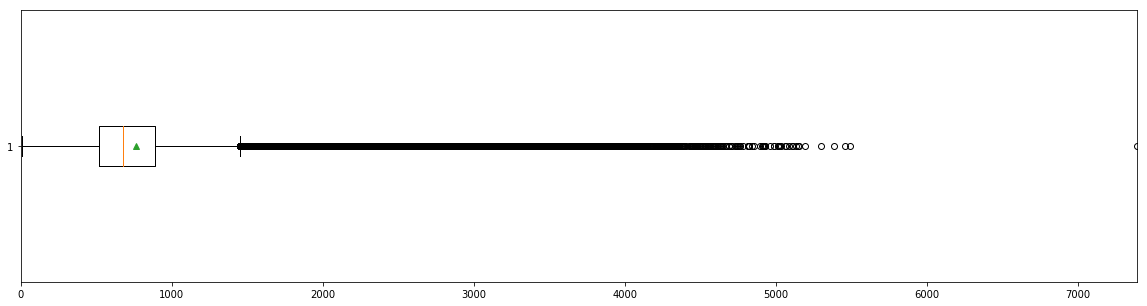

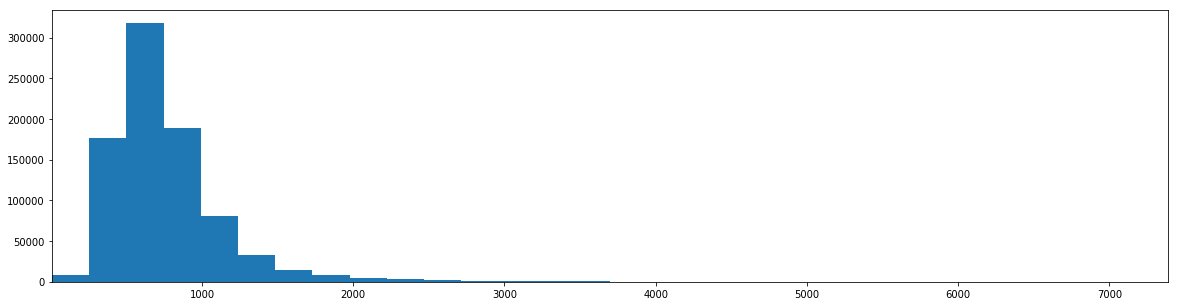

In [24]:
fig1 , ax1 = plt.subplots(1 , 1 , figsize = (20 , 5))
ax1.boxplot(dstrain.Customers , showmeans=True , vert=False)
ax1.set_xlim(0, max(dstrain["Customers"]))

fig2 , ax2 = plt.subplots(1 , 1 , figsize = (20 , 5))
ax2.hist(dstrain.Customers , cumulative = False , bins = 30 )
ax2.set_xlim((min(dstrain.Customers) , max(dstrain.Customers)))

In [25]:
print("pourcentage du nombre de clients > 2000 : {}".format(dstrain[dstrain.Customers>2000].count()[0]/dstrain.shape[0] * 100))


pourcentage du nombre de clients > 2000 : 1.7447988838593074


In [26]:
#stats : Corrélation de Pearson
stats.pearsonr(dstrain.Sales , dstrain.Customers)

#Forte corrélation (entre 0.5 et 1.0)

(0.8235517202000214, 0.0)

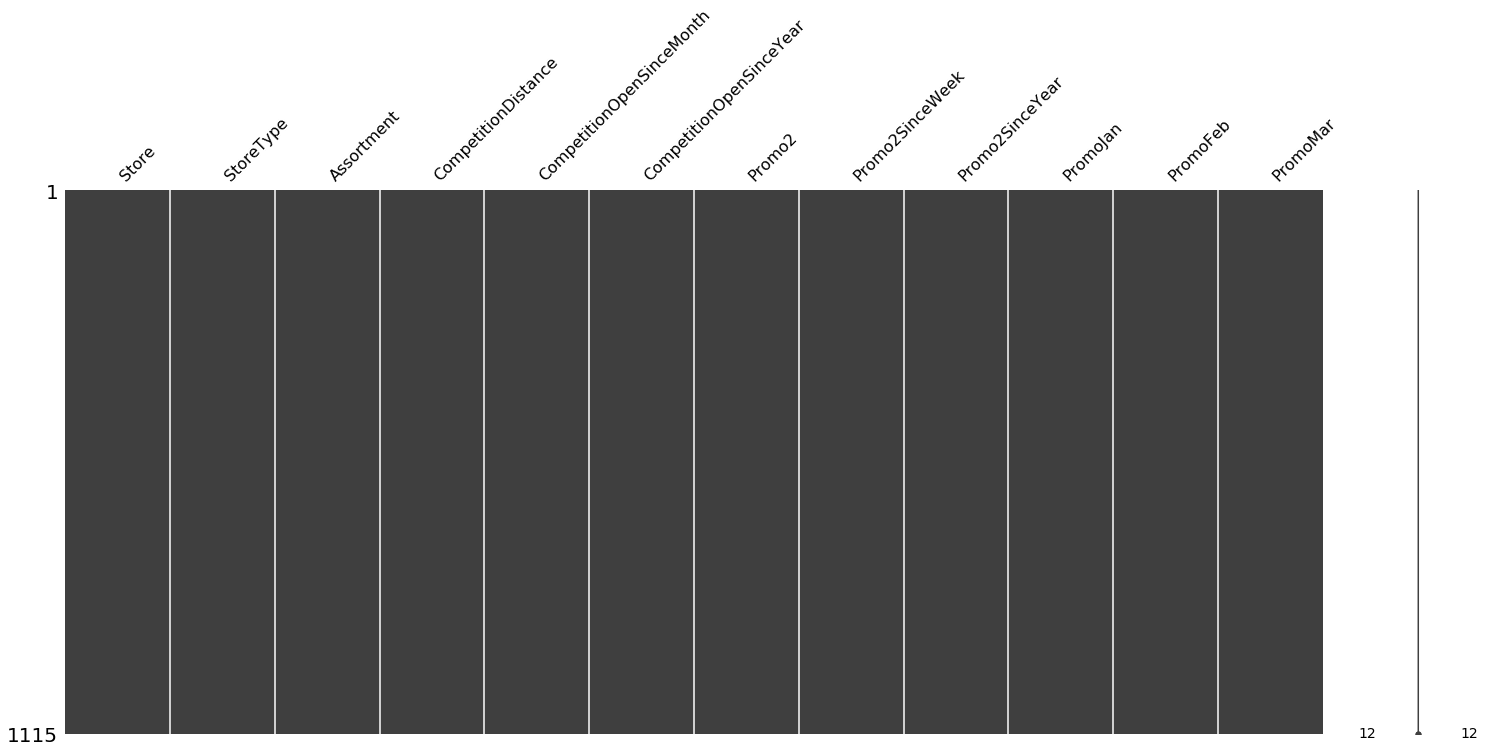

In [48]:
msno.matrix(dstore)

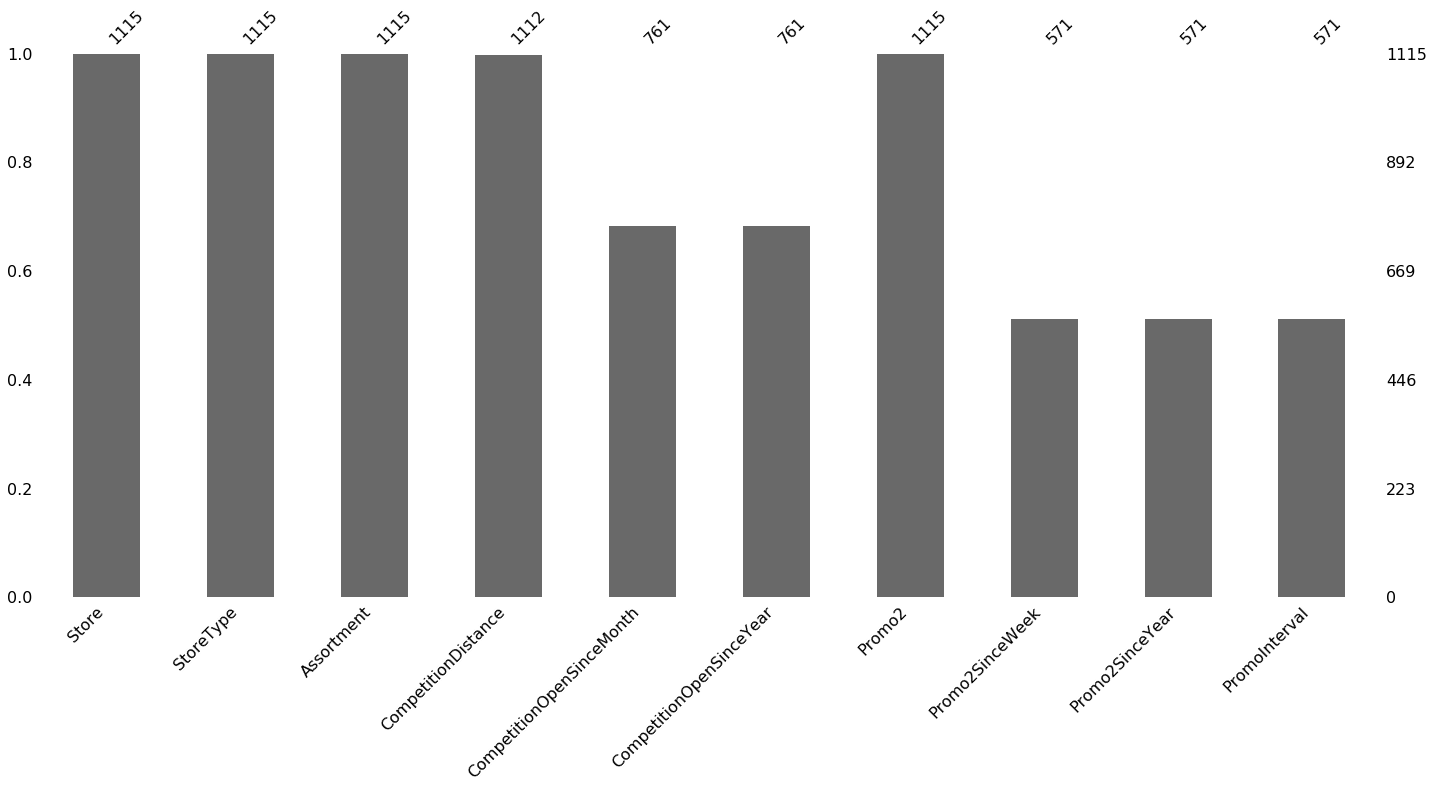

In [28]:
msno.bar(dstore)

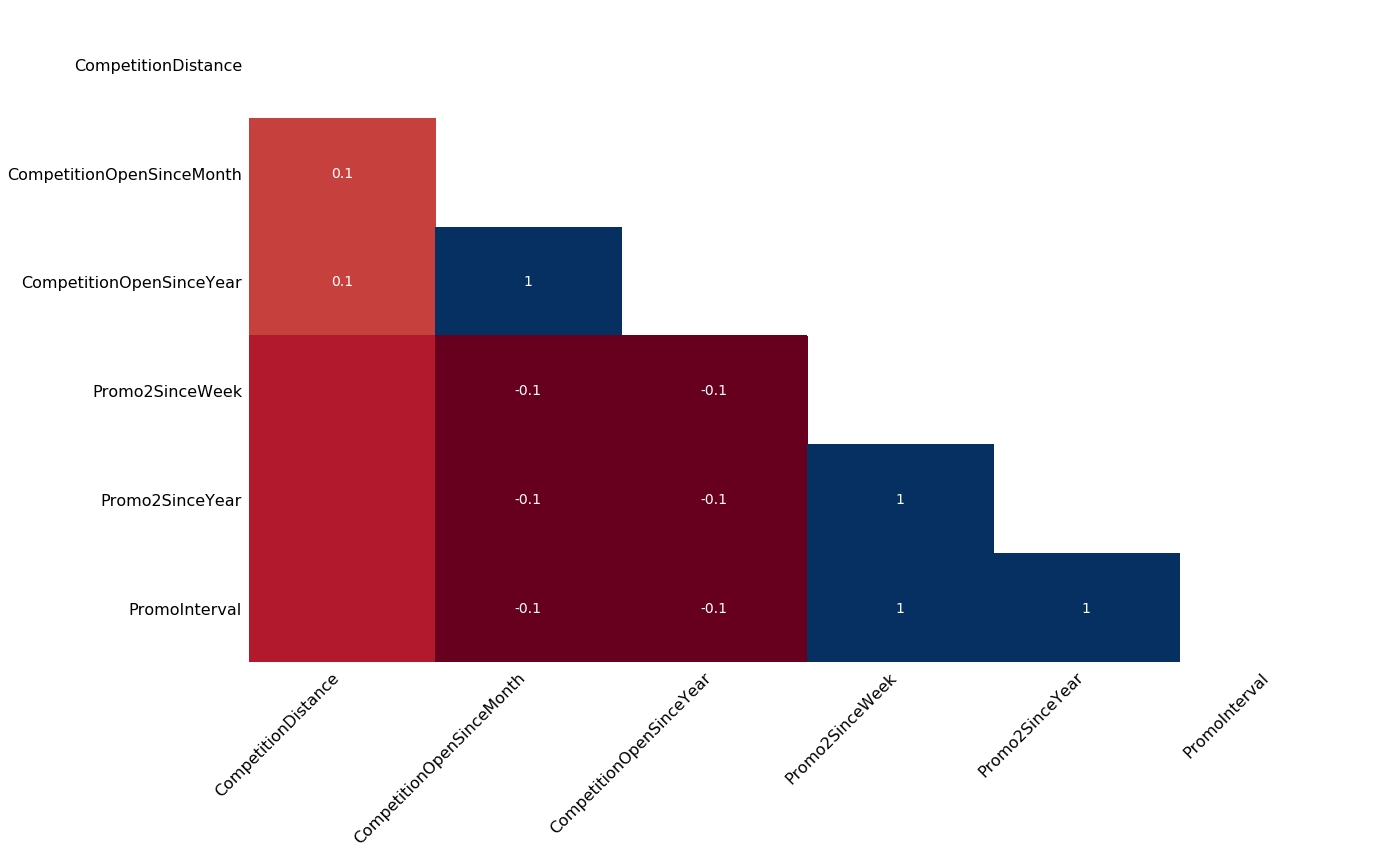

In [29]:
msno.heatmap(dstore)


In [30]:
dstore.Promo2SinceYear[dstore.Promo2 == 0]= int(0)
dstore.Promo2SinceWeek[dstore.Promo2 == 0]= int(0)


C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
#msno.dendrogram(dstore)
dstore.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [32]:
dstore['PromoJan'] = 0
dstore['PromoFeb'] = 0
dstore['PromoMar'] = 0
dstore.PromoJan[dstore.PromoInterval == 'Jan,Apr,Jul,Oct']= 1
dstore.PromoFeb[dstore.PromoInterval == 'Feb,May,Aug,Nov']=1
dstore.PromoMar[dstore.PromoInterval == 'Mar,Jun,Sept,Dec']=1

C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\bekka\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
del dstore['PromoInterval']


In [34]:
dstore.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoJan,PromoFeb,PromoMar
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,0,0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,0,0,0
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,0,0,0
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,0,0,1


In [35]:
dstore.CompetitionOpenSinceMonth.fillna(0, inplace = True)
dstore.CompetitionOpenSinceYear.fillna(0,inplace=True)
dstore['CompetitionDistance'].fillna(dstore['CompetitionDistance'].median(), inplace = True)


In [36]:
dts = pd.merge(dstrain, dstore, how = 'left', on = 'Store')


In [38]:
dts.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoJan,PromoFeb,PromoMar
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0,0


In [39]:
dts['SalesperCustomer'] = dts['Sales']/dts['Customers']

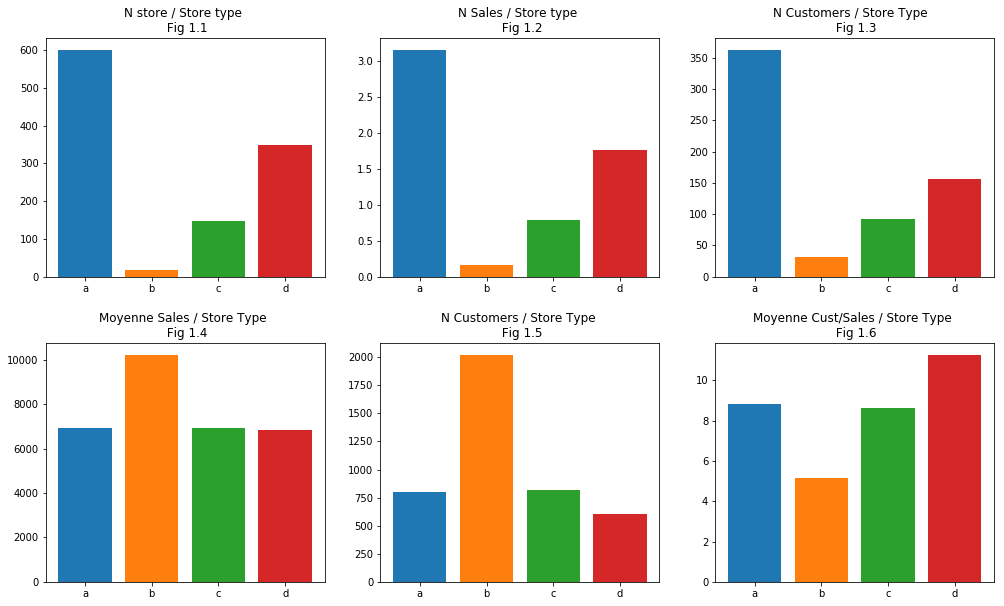

In [47]:
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(dstore.groupby(by="StoreType").count().Store.index,dstore.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("N store / Store type \n Fig 1.1")
axes[0,1].bar(dts.groupby(by="StoreType").sum().Sales.index,dts.groupby(by="StoreType").sum().Sales,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("N Sales / Store type \n Fig 1.2")
axes[0,2].bar(dts.groupby(by="StoreType").sum().Customers.index,dts.groupby(by="StoreType").sum().Customers,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("N Customers / Store Type  \n Fig 1.3")
axes[1,0].bar(dts.groupby(by="StoreType").sum().Customers.index,dts.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Moyenne Sales / Store Type \n Fig 1.4")
axes[1,1].bar(dts.groupby(by="StoreType").sum().Customers.index,dts.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("N Customers / Store Type \n Fig 1.5")
axes[1,2].bar(dts.groupby(by="StoreType").sum().Sales.index,dts.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Moyenne Cust/Sales / Store Type \n Fig 1.6")
plt.show()

In [ ]:
#Store Type / X assortments 
# dstore.groupby(by=["StoreType","Assortment"]).Assortment.count()
